In [1]:
import os 
import sys
sys.path.append("/home/martin/Work/Qutip/modules")
import math
import numpy as np
import Interferometry as In
import Utility as Ut
import parameters as pm
from qutip import Qobj, basis, sigmax, Options

# Setting up an impulse approximation interferometer

For this we need to specify two pulse strengths and a time delay. We also need a basis consisting of the rotational states $j = 0,2,4,..$, all with $m=0$. 

Additionally, we need to chose an initial state, typically the ground state corresponding to $j=0$. We also need to specify on which final state we measure the population on. This is usually the ground state.

In [26]:
Ps      = [1.4, 1.4] # The pulse strengths (atomic units)
ts      = np.linspace(0.,50.,100) # An array of time delays (atomic units)
B       = 2. # The rotational constant (atomic units) (not a physical value)
dim     = 10 # The dimension of the basis, i.e. how many states we include in the representation
istate  = Qobj(basis(dim,0)) # The initial state
mstate  = 0 # The final state on which to measure the population
Name    = 'Impulse interferometer'
Pulses  = Ut.Pulses(Ps, ts) # The instance of the pulses class with the pulse strength and time delays 
IntP    = In.ImpactInterferometry(Ps, ts, B, istate, mstate, dim, Name) # INstance of the interferometry class

Now that we have set the parameters for the impulse interferometry scheme, we can run the interferometry

In [27]:
IntP.run_interferometry()

and now we plot the result

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


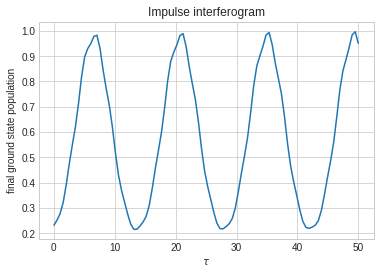

In [29]:
fig = plt.figure()
#ax = plt.axes()
plt.xlabel('$\\tau$')
plt.ylabel('final ground state population')
plt.title('Impulse interferogram')
plt.plot(IntP.tau, IntP.inter)

# Setting up the full pulse interferometer

Change parameters to be able to compare to impulse approximation

In [14]:

FWHM = 100. # (fs)
sigma = Ut.sigmaFromFWHM(FWHM)
B = 2.88*10**(-5.)
Trot = B**(-1.)
time   = np.linspace(-7.*sigma, 4.5*Trot, 1000)
Da = 9.12

ltau = 200
tau = np.zeros(ltau)
for i in range(ltau):
    tau[i] = float(i)/50.*Trot
Twind = time[-1] - time[0]

P = 1.89
I0 = Ut.getI0(P, sigma, Da)
Pparam = {'I01': I0, 'I02': I0, 'sigma': sigma, 't0': 0., 'tau': tau}
Mparam = {'B': B, 'Da': Da}
Name   = 'Second interferometer'


print(Trot/Pparam['sigma'])
print('sigma:', sigma, '(au)')
print('Trot:',Trot,'(au)')


print("Tgrid window:", Twind, "Twind/Trot:", Twind/Trot, "Twind/sigma:", Twind/sigma, "Twind/tau_max:", Twind/tau[-1])
print("Time delay", tau[-1])
print("Time resolution", (time[1] - time[0])/sigma)

print('P =',P, '(au)')
print('I0 =',I0, '(au)')
print('Checking P =', Ut.getP(Da, I0 ,sigma), '(au)')
print('Checking P =', Ut.getP_int(Da, I0 , 0., sigma), '(au)')


19.777907448044353
sigma: 1755.606467136925 (au)
Trot: 34722.22222222222 (au)
Tgrid window: 168539.24526995848 Twind/Trot: 4.853930263774805 Twind/sigma: 96.0005835161996 Twind/tau_max: 1.2195804682851268
Time delay 138194.44444444444
Time resolution 0.09609668019639613
P = 1.89 (au)
I0 = 0.0010270809207522133 (au)
P: 1.8899999999999997
Checking P = 1.8899999999999997 (au)
Checking P = 1.8900000000000003 (au)


In [15]:
IntPu    = In.PulsesInterferometry(Pparam, time, Mparam, istate, mstate, dim, Name)

In [16]:
options=Options(nsteps=3000, store_final_state=True)
print(options.store_final_state)

True


In [17]:
IntPu.run_interferometry(options)

In [18]:
print(IntPu.inter)

[0.22048293 0.22076985 0.22179264 0.22401563 0.2281477  0.23506376
 0.24571751 0.26104637 0.28184147 0.30861994 0.34150167 0.380131
 0.42365346 0.47086475 0.52031008 0.57044768 0.61980529 0.66708901
 0.71126455 0.75162058 0.78781562 0.81989047 0.84821764 0.87337884
 0.89598612 0.91647772 0.93496182 0.95115279 0.96440585 0.97382942
 0.9784295  0.97724542 0.96946064 0.9544985  0.93211223 0.90246042
 0.86618776 0.82438913 0.77852896 0.73026845 0.68124856 0.63288881
 0.5862549  0.54201558 0.50047835 0.4616701  0.42543136 0.39150978
 0.35965567 0.32972372 0.30177799 0.27617063 0.25357413 0.23492754
 0.22129706 0.21369816 0.2129232  0.21940188 0.23317581 0.25387818
 0.28078839 0.31290489 0.34902951 0.38787568 0.42820531 0.46897698
 0.50947876 0.54939486 0.5887688  0.62788739 0.66711026 0.70669758
 0.74668186 0.78680259 0.8264936  0.8649004  0.90091506 0.93323539
 0.96046373 0.98125411 0.9944987  0.99950879 0.99613321 0.98477994
 0.9663308  0.94197572 0.9130262  0.88075316 0.84627174 0.810469

In [19]:
p = np.zeros(len(time))
tps = np.zeros(len(time))
for i in range(len(time)):
    tps[i] = time[i] / pm.fs2au / 1000.
    p[i] = Ut.double_Gauss(time[i], Pparam['t0'], tau[-1], Pparam['I01'], Pparam['I02'], Pparam['sigma'], Pparam['sigma'])

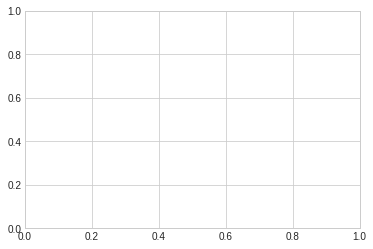

In [20]:
fig = plt.figure()
ax = plt.axes()

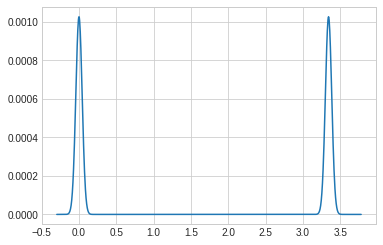

In [21]:
plt.plot(tps, p)

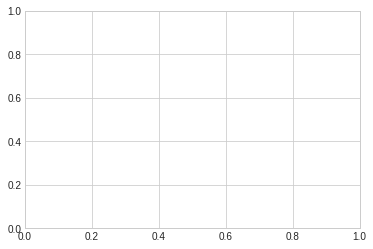

In [22]:
fig = plt.figure()
ax = plt.axes()

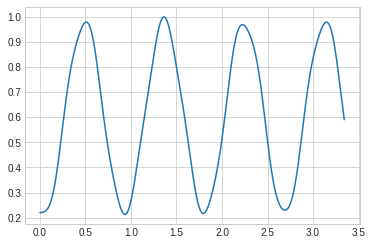

In [23]:
plt.plot(IntPu.tau/pm.fs2au/1000., IntPu.inter)

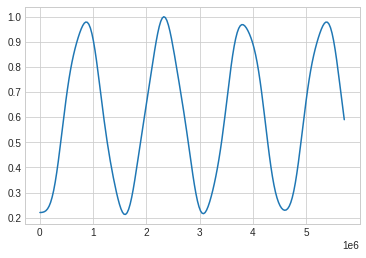

In [25]:
plt.plot(IntPu.tau*pm.fs2au, IntPu.inter)